# Análise de Sentimentos - realizada em Dezembro de 2019

![redes](images/sentimentos.jpg)

## Objetivos

### => Extrair informações sobre os sentimentos das pessoas utilizando Web Scraping/Web Crawling e Machine Learning;
### => Preparar os dados para análise;
### => Construir uma Word Clound utilizando processamento símbólico e estatístico de linguagem natural;
### => Identificar o cenário atual do partido.
<br/><br/>

## Problema: O que as pessoas pensam e falam sobre você?
![pessoas](images/pessoas_pensam.jpg)
![pessoas](images/nuvem_ds.png)
![pessoas](images/perguntas_sent.png)

## Word Clound

Maneira facilitada de vizualização da importância dos termos ditos.

#### Leitura e preparação dos dados

In [21]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

from matplotlib import transforms, pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [22]:
# define cores
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'
YELLOY1 = '#DCB732'

In [23]:
# matplotlib não tem uma função para desenhar texto com
# cores diferentes, vamos implementá-lo
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [24]:
# Lendo o arquivo geral das comentarios do partido Podemos
df = pd.read_csv('podemos.csv', sep=';', encoding='utf-8')

In [25]:
df.head()

,Frase,Class
0,"Estive na noite de ontem, no ato de filiação d...",1
1,"O PARTIDO PODEMOS ROUBAR, JÁ COMEÇAM TRABALHAR...",-1
2,"O lider do podemos19 no SenadoFederal, Alvaro...",0
3,"Em seguida, o prof_samarques deu boas vindas a...",0
4,O vereador Marcial Lima destacou a realização ...,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Frase   73 non-null     object
 1   Class   73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [27]:
summary = df.dropna(subset=['Frase'], axis=0)['Frase']

In [28]:
summary

0     Estive na noite de ontem, no ato de filiação d...
1     O PARTIDO PODEMOS ROUBAR, JÁ COMEÇAM TRABALHAR...
2     O lider do podemos19  no SenadoFederal, Alvaro...
3     Em seguida, o prof_samarques deu boas vindas a...
4     O vereador Marcial Lima destacou a realização ...
                            ...                        
68    A proposta de reforma apresentada é injusta co...
69    Tomara seja daquelas leis que “não pegam” e sã...
70    99,9999999 % de reprovação. O resto, foi descu...
71               Tá aí nosso novo ministro da economia.
72    O CERTO É O GOVERNADOR REDUZIR O ICMS. Não ven...
Name: Frase, Length: 73, dtype: object

In [29]:
#Exemplos de frases
display(summary.iloc[2])
display(summary.iloc[5])
display(summary.iloc[12])

'O lider do podemos19  no SenadoFederal, Alvaro Dias, participa do encontro do Podemos na tarde deste sábado (30/11)'

'No passado sábado - 30 de Nov. Na Cidade da Beira, realizamos uma reunião Nacional de Secretários do Partido PODEMOS com vista a alinhar estratégia de trabalho 2020 e formamos formadores sobre matéria de doutrina partidária. Objectivo: levar aos distritos nossa linha política'

'Marco Feliciano foi expulso do partido Podemos, após uma série de acusações envolvendo inclusive assédio sexual no gabinete.Volto a dizer: Não fui a primeira vítima do Feliciano e muito menos a única, apenas a primeira a denunciá-lo.'

In [30]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 12330


#### Retirada de stopwords e geração da Word Clound

In [31]:
# stopwords
import nltk
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

In [32]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

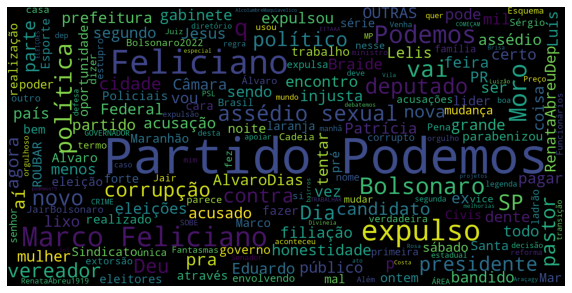

In [33]:
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
# wordcloud.to_file("podemos.png")

## Cenário Atual

#### Preparação dos dados

In [34]:
df['Class'].value_counts()

-1    37
 0    21
 1    15
Name: Class, dtype: int64

In [35]:
# informações do dataset
X = ['Neutro',
    'Negativo', 
    'Positivo']

Y = [(df['Class'].value_counts()[0])*100/len(df['Class']),
    (df['Class'].value_counts()[-1])*100/len(df['Class']),
    (df['Class'].value_counts()[1])*100/len(df['Class'])]  # quantidades de cada classe

#### Visualização dos resultados

Text(-30, -1.0, 'Fonte de dados: scrapers/crawlers')

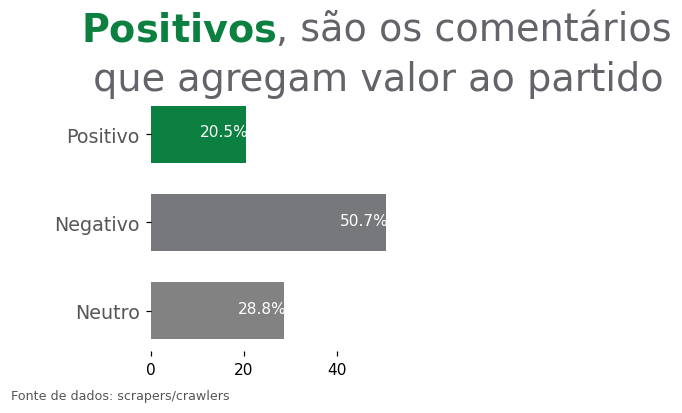

In [36]:
# criar nova figura
fig, ax1 = plt.subplots(figsize=(9, 4.65),  # largura, altura em polegadas
                        dpi=110)              # resolução da figura

# ajustar o layout do subplot definindo os lados da figura
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)

# desenhar barras horizontais
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color=[GRAY6]+[GRAY5]+[GREEN1])

# adicionar numeral em cada barra
for i, b in enumerate(bars):
    plt.text(b.get_width() - 10, b.get_y() + 0.3,
             str(round(Y[i],1))+'%',
             fontsize=10,
             color='white')
    
# definir propriedades para o objeto de eixos
#(marcações para todos os problemas com rótulos)
plt.setp(ax1, yticks=np.arange(len(X)), yticklabels=X)

# alterar a aparência de tiques, rótulos e linhas de grade
ax1.tick_params(bottom='off', left='off', labelbottom='off')

# configure a aparência da etiqueta y
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# remover borda do gráfico
for spine in ax1.spines.values():
    spine.set_visible(False)

# título do plot
rainbow_text(-15, 2.5,
             '$\\bf{Positivos\ }$||, são os comentários\n'
              ' que agregam valor ao partido',
             [[GREEN1, GRAY4],[GRAY4, GRAY4]],
             spacing=50,
             ax=ax1,
             fontsize=25)

# nota de rodapé com a fonte de dados
ax1.text(-30, -1.,
         'Fonte de dados: scrapers/crawlers',
         fontsize=8.3,
         color=GRAY3)